***DATASET ABOUT THE CROP OF ANTIOQUIA***

In [44]:
#importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [2]:
data_fields = pd.read_csv('Areas_cultivadas_y_produccion_agr_cola_en_Antioquia_desde_1990-2022_20250716.csv')
df = data_fields.copy()
df.head()


,Tipo,Rubro,Subregion,Año,Municipio,Área Total,Área Producción,Volumen Producción
0,Permanentes,Aguacate,Oriente,1990,Abejorral,45.0,23.0,138.0
1,Permanentes,Aguacate,Urabá,1990,Apartadó,29.0,27.0,405.0
2,Permanentes,Aguacate,Suroeste,1990,Montebello,17.0,12.0,78.0
3,Permanentes,Aguacate,Suroeste,1990,Santa Bárbara,150.0,140.0,980.0
4,Permanentes,Aguacate,Urabá,1990,Turbo,75.0,55.0,825.0


In [3]:
df.dropna(inplace=True) #elimina las columnas no null
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"Cuantos Nulos": missing_count, "Porcentaje": missing_percentage})
missing_df

,Cuantos Nulos,Porcentaje
Tipo,0,0.0
Rubro,0,0.0
Subregion,0,0.0
Año,0,0.0
Municipio,0,0.0
Área Total,0,0.0
Área Producción,0,0.0
Volumen Producción,0,0.0


In [6]:
df.describe().T #describe el dataset

,count,mean,std,min,25%,50%,75%,max
Año,32261.0,2009.625120,8.901887,1990.0,2003.0,2011.0,2017.0,2022.0
Área Total,32261.0,440.667171,1230.922963,0.0,20.0,79.0,322.0,36000.0
Área Producción,32261.0,399.733004,1146.032283,0.0,15.0,65.0,285.0,36000.0
Volumen Producción,32261.0,3171.734478,23320.412719,0.0,58.8,296.0,1292.5,1039280.0


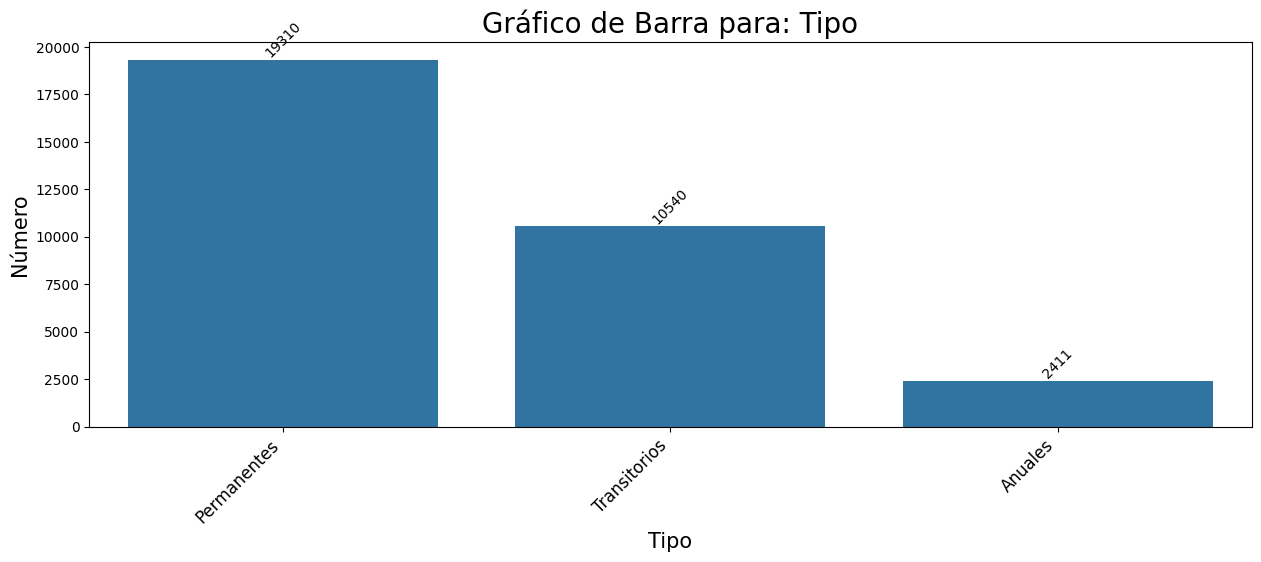

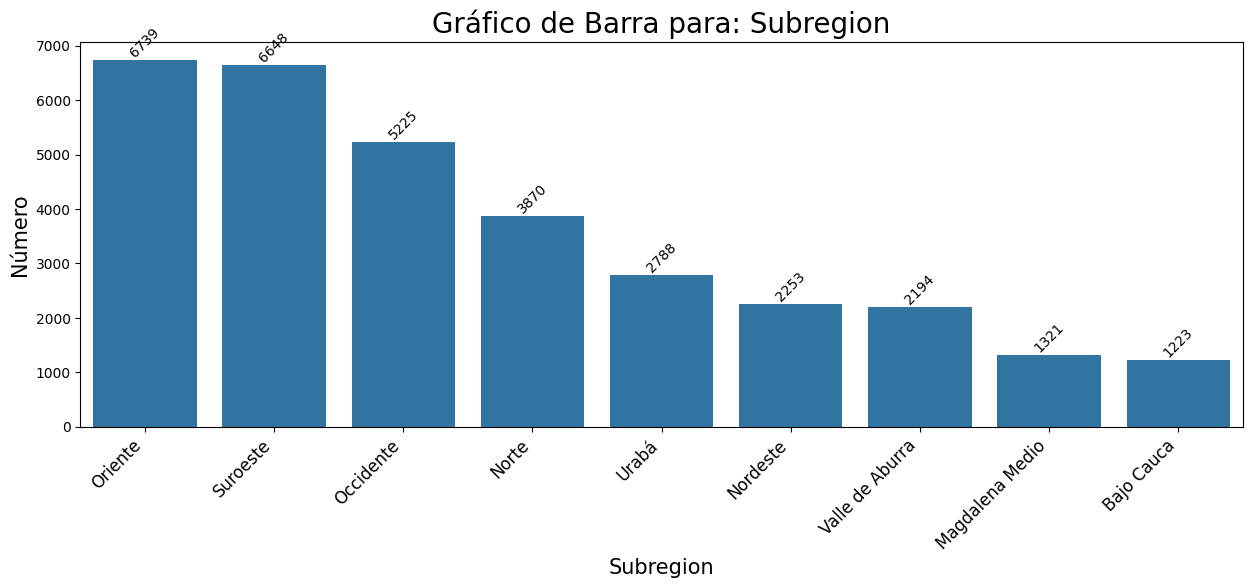

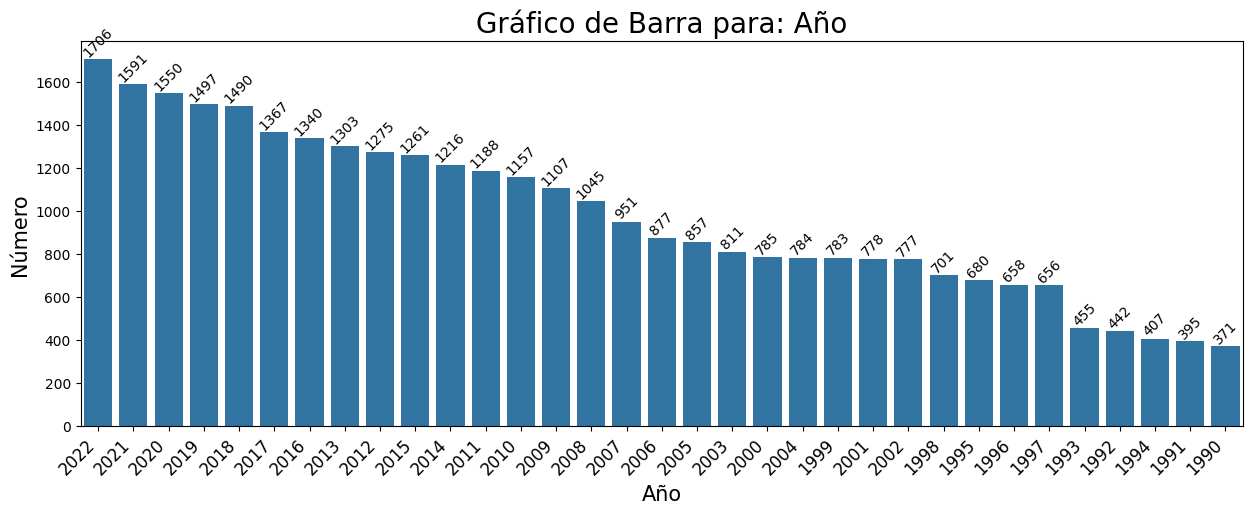

In [11]:
# Visualización de los datos categóricos
import plotly.graph_objects as go
import plotly.express as px

def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Número', fontsize=15)
        plt.title(f'Gráfico de Barra para: {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()

cat_features = ["Tipo", "Subregion","Año"]

plot_bar_graphs(df, cat_features)

In [19]:
numerical_features = ["Volumen Producción", "Área Total", "Área Producción"]

scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,Tipo,Rubro,Subregion,Año,Municipio,Área Total,Área Producción,Volumen Producción
0,Permanentes,Aguacate,Oriente,1990,Abejorral,0.001250,0.000639,0.000133
1,Permanentes,Aguacate,Urabá,1990,Apartadó,0.000806,0.000750,0.000390
2,Permanentes,Aguacate,Suroeste,1990,Montebello,0.000472,0.000333,0.000075
3,Permanentes,Aguacate,Suroeste,1990,Santa Bárbara,0.004167,0.003889,0.000943
4,Permanentes,Aguacate,Urabá,1990,Turbo,0.002083,0.001528,0.000794
...,...,...,...,...,...,...,...,...
32716,Permanentes,Zapote,Magdalena Medio,2022,Caracolí,0.000083,0.000083,0.000014
32717,Permanentes,Zapote,Occidente,2022,Olaya,0.000639,0.000194,0.000013
32718,Permanentes,Zapote,Urabá,2022,San Pedro de Uraba,0.000333,0.000333,0.000058
32719,Permanentes,Zapote,Occidente,2022,Sopetrán,0.000583,0.000583,0.000273


In [21]:
df_label_encoded = df.copy()
categorical_columns = ["Tipo", "Rubro", "Subregion", "Municipio"]
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_label_encoded[column] = le.fit_transform(df_label_encoded[column])
    label_encoders[column] = le
    
df_label_encoded.head()

,Tipo,Rubro,Subregion,Año,Municipio,Área Total,Área Producción,Volumen Producción
0,1,6,5,1990,12,0.001250,0.000639,0.000133
1,1,6,7,1990,22,0.000806,0.000750,0.000390
2,1,6,6,1990,85,0.000472,0.000333,0.000075
3,1,6,6,1990,115,0.004167,0.003889,0.000943
4,1,6,7,1990,126,0.002083,0.001528,0.000794


In [23]:
df_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32261 entries, 0 to 32720
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tipo                32261 non-null  int64  
 1   Rubro               32261 non-null  int64  
 2   Subregion           32261 non-null  int64  
 3   Año                 32261 non-null  int64  
 4   Municipio           32261 non-null  int64  
 5   Área Total          32261 non-null  float64
 6   Área Producción     32261 non-null  float64
 7   Volumen Producción  32261 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 2.2 MB


***MATRIZ DE CORRELACIÓN***

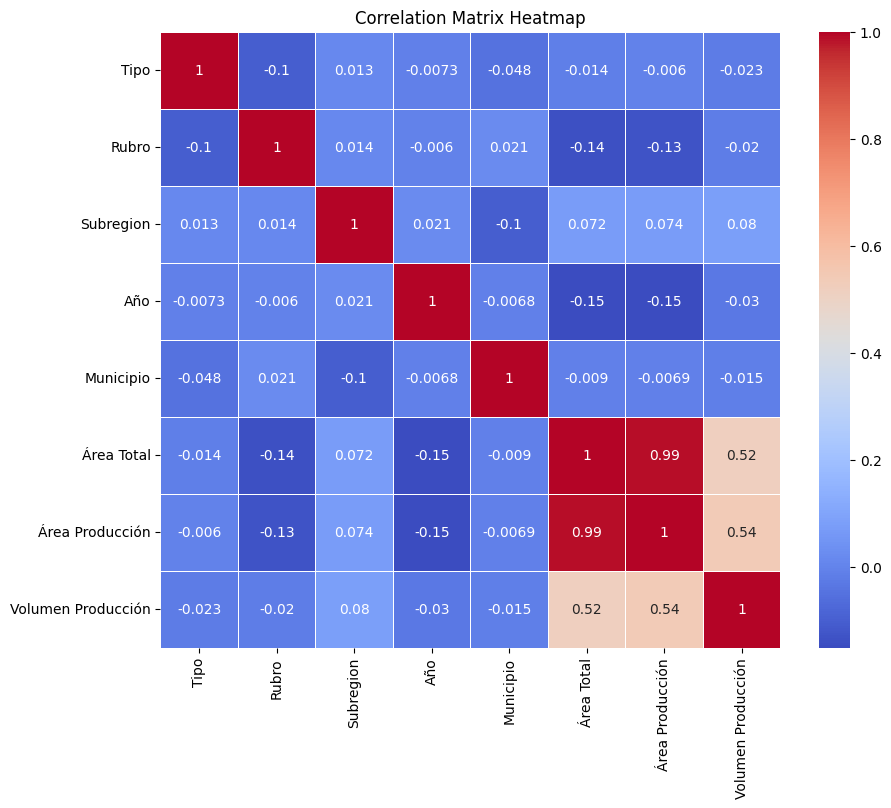

In [24]:
correlation_matrix = df_label_encoded.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

***TRAINER MACHINE***

In [25]:
Y = df_label_encoded['Volumen Producción']  # Target variable
X = df_label_encoded.drop(['Volumen Producción'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

***METHOD DECISIONTREE***

In [28]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


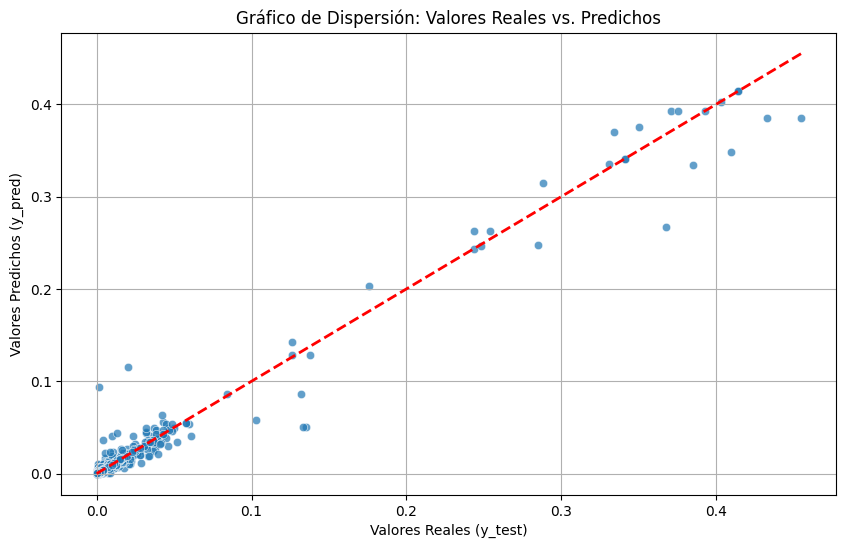

In [32]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2) 
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Valores Predichos (y_pred)")
plt.title("Gráfico de Dispersión: Valores Reales vs. Predichos")
plt.grid(True)
plt.show()

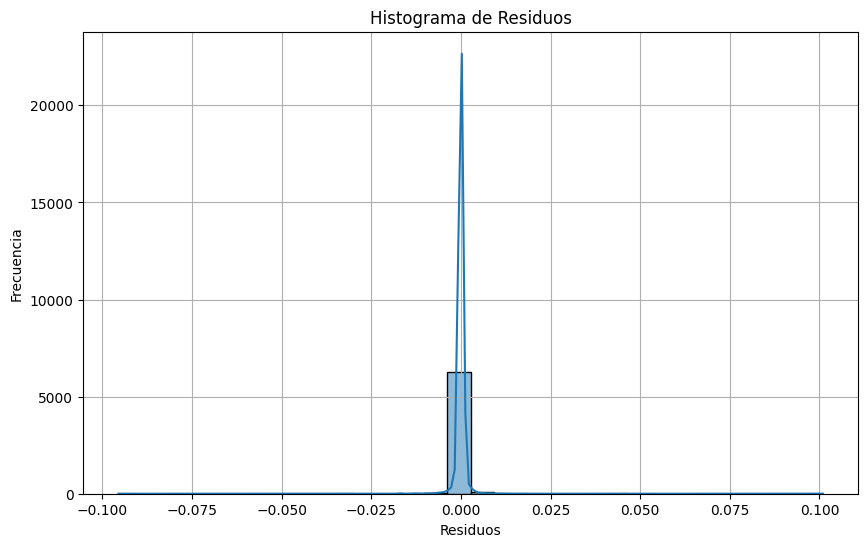

In [33]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.grid(True)
plt.show()

In [34]:
mean_absolute_error_value = mean_absolute_error(y_test, y_pred)
r2_score_value = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mean_absolute_error_value}")
print(f"R^2 Score: {r2_score_value}")

Mean Absolute Error: 0.0005065889685182161
R^2 Score: 0.9740378223136262


***METHOD RAMDOMFOREST***

In [37]:
model_RM = RandomForestRegressor()
model_RM.fit(X_train, y_train)
y_pred_RM = model_RM.predict(X_test)

In [40]:
mean_absolute_error_value = mean_absolute_error(y_test, y_pred_RM)
r2_score_value = r2_score(y_test, y_pred_RM)
print(f"Mean Absolute Error: {mean_absolute_error_value}")
print(f"R^2 Score: {r2_score_value}")

Mean Absolute Error: 0.00044513091820685665
R^2 Score: 0.9810525644025997


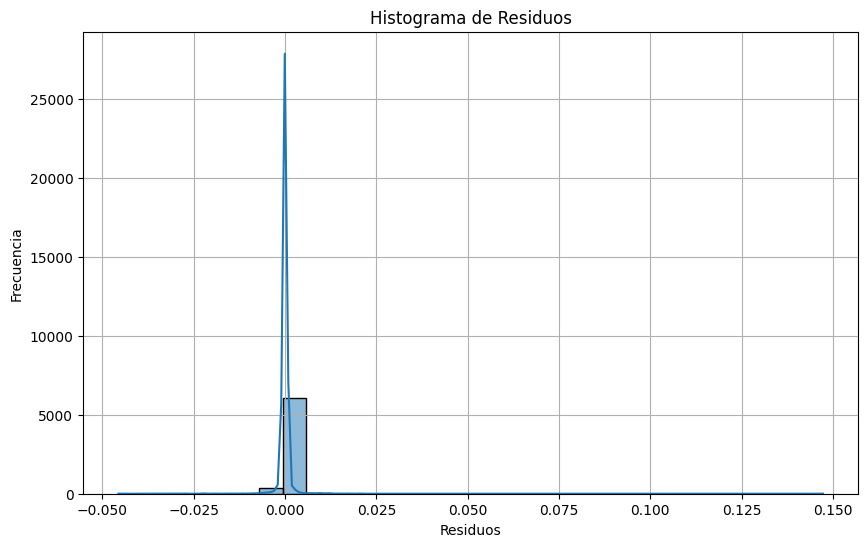

In [41]:
residuals = y_test - y_pred_RM
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.grid(True)
plt.show()

***METHOD LINEARREGRESSOR***

In [45]:
model_L = LinearRegression()
model_L.fit(X_train, y_train)
y_pred_L = model_L.predict(X_test)

In [46]:
mean_absolute_error_value = mean_absolute_error(y_test, y_pred_L)
r2_score_value = r2_score(y_test, y_pred_L)
print(f"Mean Absolute Error: {mean_absolute_error_value}")
print(f"R^2 Score: {r2_score_value}")

Mean Absolute Error: 0.004577985257484468
R^2 Score: 0.36017509367994827


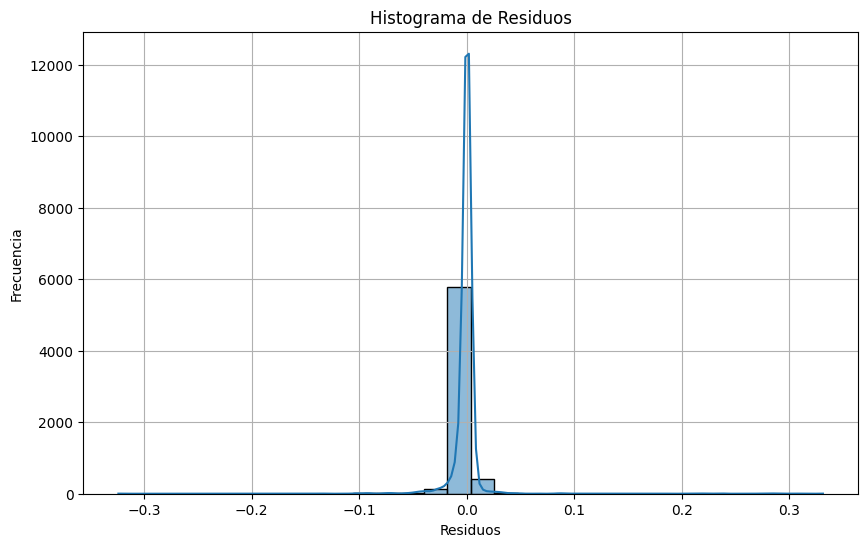

In [47]:
residuals = y_test - y_pred_L
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.grid(True)
plt.show()